Question A
himanshu shete(23b0770)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [13]:
# split features and target
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

# one-hot encode categorical column
X = pd.get_dummies(X, columns=['Extracurricular Activities'], drop_first=True)

# z-score standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [14]:
X_train_np = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_np = np.c_[np.ones(X_test.shape[0]), X_test]
y_train_np = y_train.values.reshape(-1, 1)
y_test_np = y_test.values.reshape(-1, 1)

theta = np.linalg.inv(X_train_np.T @ X_train_np) @ (X_train_np.T @ y_train_np)

y_pred_scratch = X_test_np @ theta


In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_sklearn = lr.predict(X_test)

In [16]:
# scratch metrics
mse_scratch = mean_squared_error(y_test, y_pred_scratch)
r2_scratch = r2_score(y_test, y_pred_scratch)

# scikit-learn metrics
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print("Model 1 (Scratch) -> MSE:", mse_scratch, "R2 Score:", r2_scratch)
print("Model 2 (Scikit-learn) -> MSE:", mse_sklearn, "R2 Score:", r2_sklearn)

Model 1 (Scratch) -> MSE: 4.08262839852186 R2 Score: 0.9889832909573145
Model 2 (Scikit-learn) -> MSE: 4.082628398521854 R2 Score: 0.9889832909573145


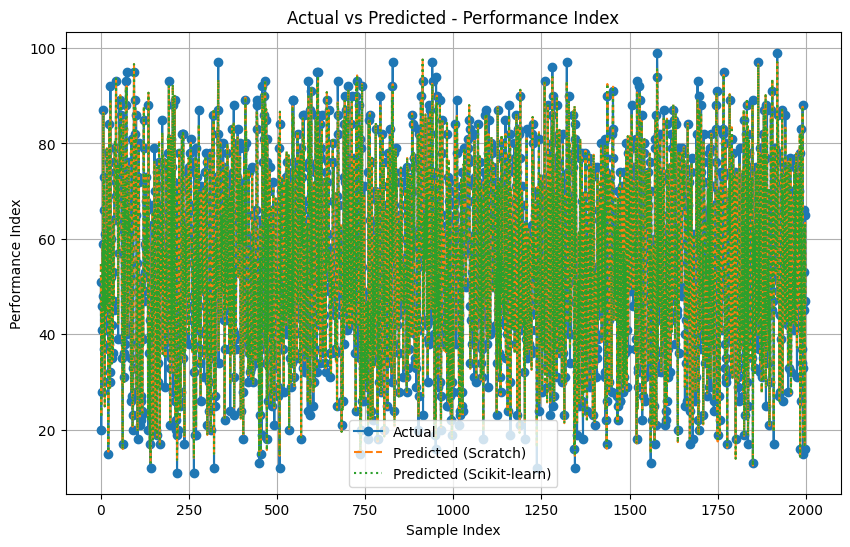

In [17]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred_scratch, label='Predicted (Scratch)', linestyle='--')
plt.plot(y_pred_sklearn, label='Predicted (Scikit-learn)', linestyle=':')
plt.legend()
plt.title('Actual vs Predicted - Performance Index')
plt.xlabel('Sample Index')
plt.ylabel('Performance Index')
plt.grid(True)
plt.show()